In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

#Find the releative path of Lib folder
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import PyDFN3D as dfnpy

work_dir=%pwd
print('Current Workdir=',work_dir)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Current Workdir= e:\Code_Repos\PyDFN3D\Examples


In [3]:
Case1=dfnpy.DFN_Model()
#Case1.loadDFN('..\Datas\DFN_2fracs.dat')
#Case1.loadDFN('..\Datas\DFN_4fracs.dat')
#Case1.loadDFN('..\Datas\DFN_4fracs_Well.dat')
Case1.loadDFN('..\Datas\dfnworks_4rects_Well.dat')

[Input] Reading "..\Datas\dfnworks_4rects_Well.dat" DFN file....
Dimension= 3
Number of Points= 25
Number of Fractures= 4
Number of Intersections= 3
Number of Wells= 2
Fracture 0 has Intersections of  [0, 1, 2]
Fracture 1 has Intersections of  [0]
Fracture 2 has Intersections of  [1]
Fracture 3 has Intersections of  [2]


------------Setting up Fracture 1------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:23(Total) 14(Edge) 9(Trace)
[Mesh] Number of Nodes:69(Total) 42(Edge) 27(Trace) 0(Source)
------------Setting up Fracture 2------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:16(Total) 12(Edge) 3(Trace)
[Mesh] Number of Nodes:46(Total) 36(Edge) 9(Trace) 1(Source)
------------Setting up Fracture 3------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:16(Total) 12(Edge) 3(Trace)
[Mesh] Number of Nodes:46(Total) 36(Edge) 9(Trace) 1(Source)
------------Setting up Fracture 4------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:16(Total) 12(Edge) 3(Trace)
[Mesh] Number of Nodes:46(Total) 36(Edge) 9(Trace) 1(Source)
Total DOF= 207

------------ Fracture 0------------


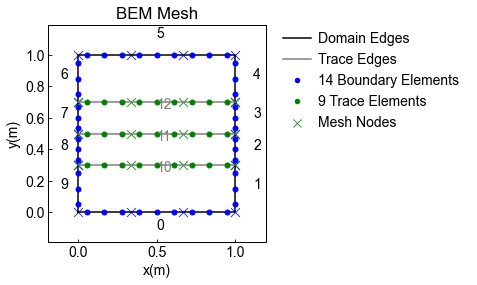


------------ Fracture 1------------


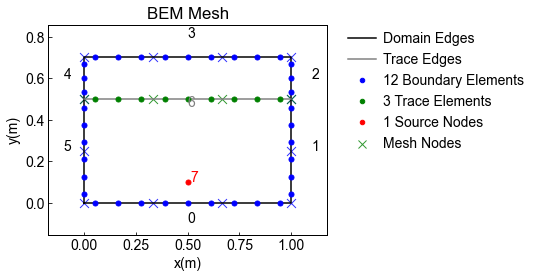


------------ Fracture 2------------


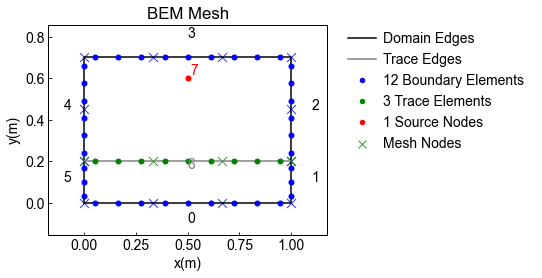


------------ Fracture 3------------


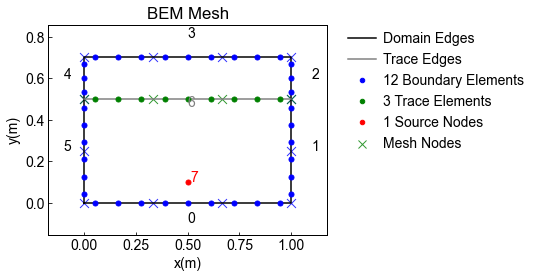

In [4]:
h_mesh_frac=1/3
Case1.setFlowSolver(solver='BEM',h_frac=h_mesh_frac,h_trace=h_mesh_frac)

for i in range(Case1.FracNets.NumFracs):
    print('\n------------ Fracture %d------------'%(i))
    Case1.FlowSolver.showMesh(i)

## Set up boundary conditions

In [5]:
#2. Set up boundary condition automatically
#Inlets=[(2,7,'Dirichlet',2e6)] #Inlets (fracID,BdID,BCtype,BCvalue)
Inlets=[(2,3,'Dirichlet',2e6)] #Inlets (fracID,BdID,BCtype,BCvalue)
#Outlets=[(1,7,'Dirichlet',1e6),(3,7,'Dirichlet',1e6)] #Outlets (fracID,BdID)
Outlets=[(1,0,'Dirichlet',1e6),(3,0,'Dirichlet',1e6)] #Outlets (fracID,BdID)

for BC in Inlets+Outlets:
    fracID,BDID,BC_type,BC_val=BC
    if(BC_type=='Dirichlet'):
        Case1.setBoundaryConditions(fracID=fracID,DirichletBC=[(BDID,BC_val)])
    if(BC_type=='Neumann'):
        Case1.setBoundaryConditions(fracID=fracID,NeumannBC=[(BDID,BC_val)])

[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(3, 2000000.0)]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(0, 1000000.0)]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(0, 1000000.0)]


## Set up frac props and solve

[Solution] #DOFs= 69
[Solution] #DOFs= 46
[Solution] #DOFs= 46
[Solution] #DOFs= 46
10	0.06325878343159064		alpha:	1133837172.2810924
20	0.0002075325281657716		alpha:	118506721.00594643
30	0.00037569266024631336		alpha:	1428226766.4793208
40	1.1003658195147358e-05		alpha:	112136915.71197735
50	3.755198491141657e-05		alpha:	3728821310.319628
60	2.0687713605736462e-07		alpha:	108816032.6042507
70	4.3431016659675927e-07		alpha:	2269255745.537258
80	6.269337962607532e-10		alpha:	126962739.90377046
90	2.0723641779872113e-11		alpha:	108744480.89594838
100	4.037895070940963e-11		alpha:	120743360.19382527
110	7.027103988951799e-12		alpha:	4520050668.037627
120	1.7991458827804488e-14		alpha:	121121794.0560294
Converged at 121 Steps! TOL= 1e-14
Dirichelt [1294117.64705844 1294117.64705844 1294117.64705844 1294117.64705844
 1294117.64705844 1294117.64705844 1294117.64705844 1294117.64705844
 1294117.64705844]
Neumann [-5.88235294e-05 -5.88235294e-05 -5.88235294e-05 -5.88235294e-05
 -5.88235294e-0

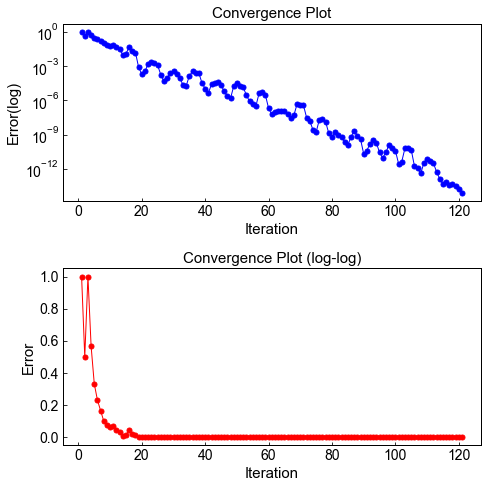

In [6]:
Case1.setFracProperties(perm=3e-10,aperature=0.001)
Case1.solveFlow(max_iters=500,tolerance=1e-14)

### Check mass balance error and write Paraview file

In [7]:
Q_in=0.0
Q_out=0.0
for BC in Inlets:
    fracID,BDID,BC_type,BC_val=BC
    Flux=Case1.FlowSolver.SubProblems[fracID].PostProcess.get_BDFlux(BDID)
    Q_in+=Flux
    print('[Inlet Flux] Frac %d Boundary ID %d Flux=%s [m^3]'%(fracID,BDID,Flux))
for BC in Outlets:
    fracID,BDID,BC_type,BC_val=BC
    Flux=Case1.FlowSolver.SubProblems[fracID].PostProcess.get_BDFlux(BDID)
    Q_out+=Flux
    print('[Outlet Flux] Frac %d Boundary ID %d Flux=%s [m^3]'%(fracID,BDID,Flux))

print('[Mass Balance]',abs(Q_in+Q_out))

[Inlet Flux] Frac 2 Boundary ID 3 Flux=0.00035294117647082066 [m^3]
[Outlet Flux] Frac 1 Boundary ID 0 Flux=-0.00017647058823506246 [m^3]
[Outlet Flux] Frac 3 Boundary ID 0 Flux=-0.00017647058823506225 [m^3]
[Mass Balance] 6.959493745184453e-16


In [30]:
#FEM-BEM Error %0.13
(-3.534033112776075E-4 +0.0003529411764706044)/0.0003529411764706044*100

-0.13093819531753373

In [23]:
#Mesh=Case1.writeSolution(mesh_input='..\Datas\DFN_4fracs_Well.msh',fname='DFN_4fracs_Well.vtp')
Mesh=Case1.writeSolution(mesh_input='..\Datas\dfnworks_4rects_gmsh.msh',fname='dfnworks_4rects.vtp')

Pressure Range= 999999.9999999998 2000000.0000000002
[Output] Saved VTK mesh and solution file Results\dfnworks_4rects_solution.vtu) !
